# Step 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Species_clustering_classification.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

   Area     species  species_number  height  crown_width  dbh health  \
0     5  Acerifolia               1     2.5          2.5   20   Good   
1     4  Acerifolia               1     2.5          2.5   20   Good   
2     4  Acerifolia               1     2.5          2.5   20   Good   
3     1  Acerifolia               1     2.5          2.5   20   Poor   
4     5  Acerifolia               1     2.5          2.5   20   Fair   

   health_number  
0              3  
1              3  
2              3  
3              4  
4              2  


# Step 2: Data Preprocessing

## Check for missing values:

In [2]:
print(df.isnull().sum())

Area              0
species           0
species_number    0
height            0
crown_width       0
dbh               0
health            0
health_number     0
dtype: int64


## Check data types:

In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Area            104352 non-null  int64  
 1   species         104352 non-null  object 
 2   species_number  104352 non-null  int64  
 3   height          104352 non-null  float64
 4   crown_width     104352 non-null  float64
 5   dbh             104352 non-null  int64  
 6   health          104352 non-null  object 
 7   health_number   104352 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.4+ MB
None


## Encode categorical variables

In [4]:
from sklearn.preprocessing import LabelEncoder

le_species = LabelEncoder()
le_health = LabelEncoder()

df["species"] = le_species.fit_transform(df["species"])
df["health"] = le_health.fit_transform(df["health"])


## Normalize/Standardize numerical features

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ["height", "crown_width", "dbh"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [6]:
print(df.head())

   Area  species  species_number    height  crown_width       dbh  health  \
0     5        0               1 -0.730375     -0.54306 -0.845389       2   
1     4        0               1 -0.730375     -0.54306 -0.845389       2   
2     4        0               1 -0.730375     -0.54306 -0.845389       2   
3     1        0               1 -0.730375     -0.54306 -0.845389       3   
4     5        0               1 -0.730375     -0.54306 -0.845389       1   

   health_number  
0              3  
1              3  
2              3  
3              4  
4              2  


# Step 3: Exploratory Data Analysis (EDA)

## Summary statistics:

In [7]:
print(df.describe())


                Area        species  species_number        height  \
count  104352.000000  104352.000000   104352.000000  1.043520e+05   
mean        3.778049     144.492544      145.492544 -1.726787e-16   
std         1.302773      86.532525       86.532525  1.000005e+00   
min         1.000000       0.000000        1.000000 -7.303747e-01   
25%         3.000000      62.000000       63.000000 -7.303747e-01   
50%         4.000000     149.000000      150.000000 -7.303747e-01   
75%         5.000000     208.000000      209.000000  6.216059e-01   
max         5.000000     310.000000      311.000000  4.308826e+00   

        crown_width           dbh         health  health_number  
count  1.043520e+05  1.043520e+05  104352.000000  104352.000000  
mean  -1.318241e-16 -5.392804e-17       1.932134       2.932134  
std    1.000005e+00  1.000005e+00       0.292295       0.292295  
min   -5.430601e-01 -8.453886e-01       0.000000       1.000000  
25%   -5.430601e-01 -8.453886e-01       2.000000

## Visualizations

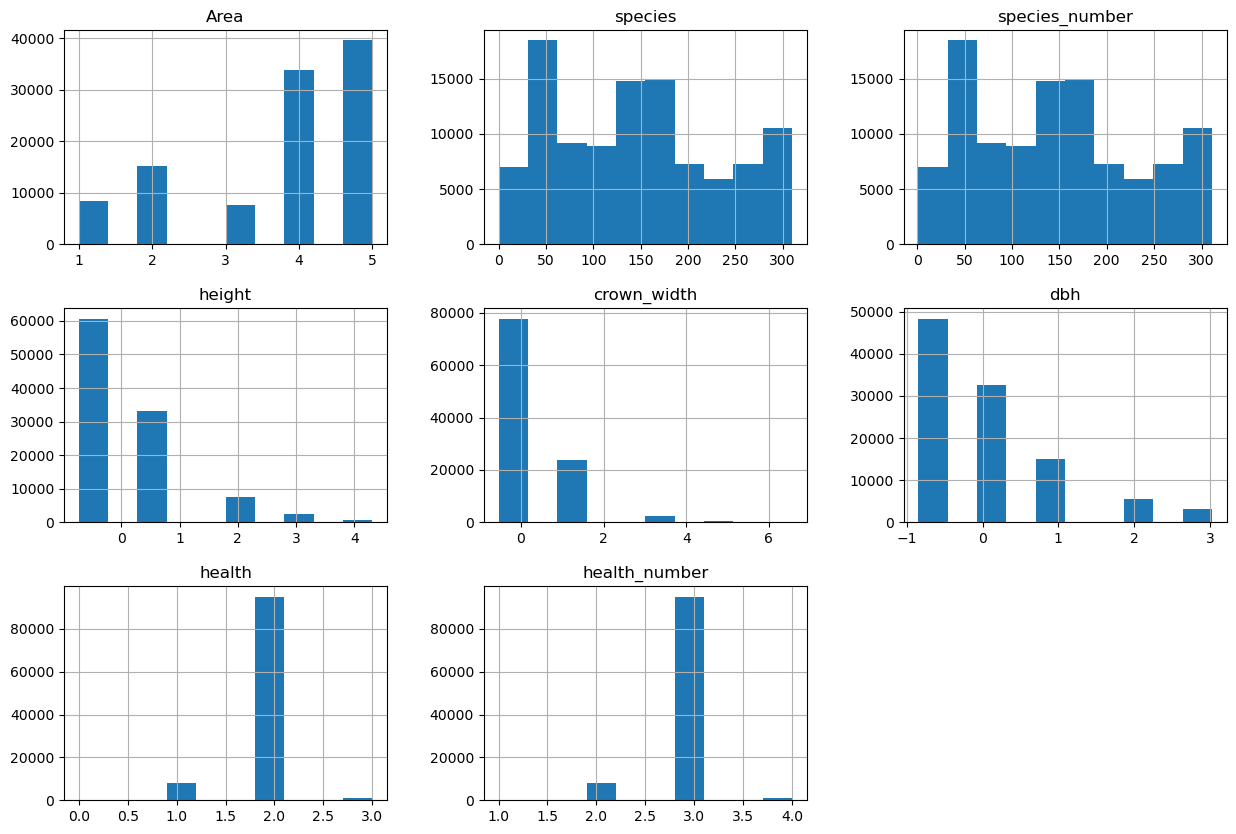

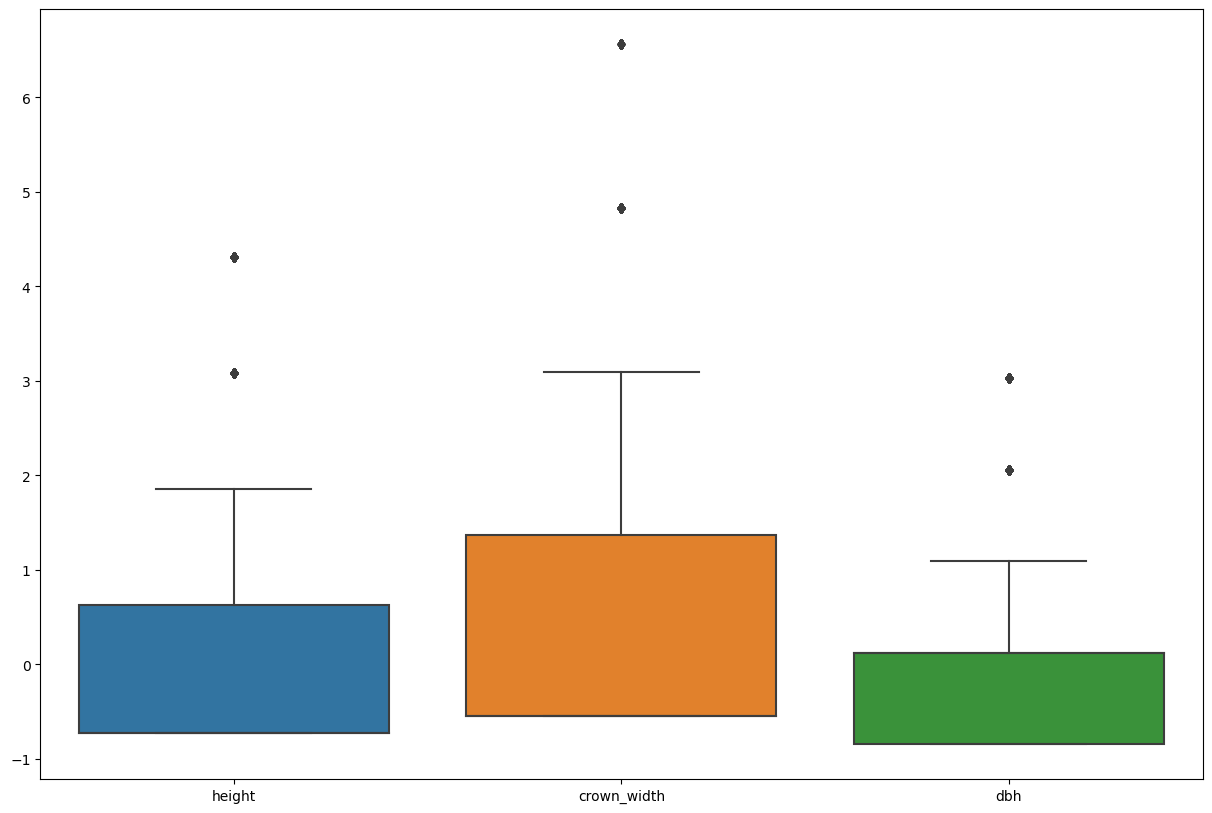

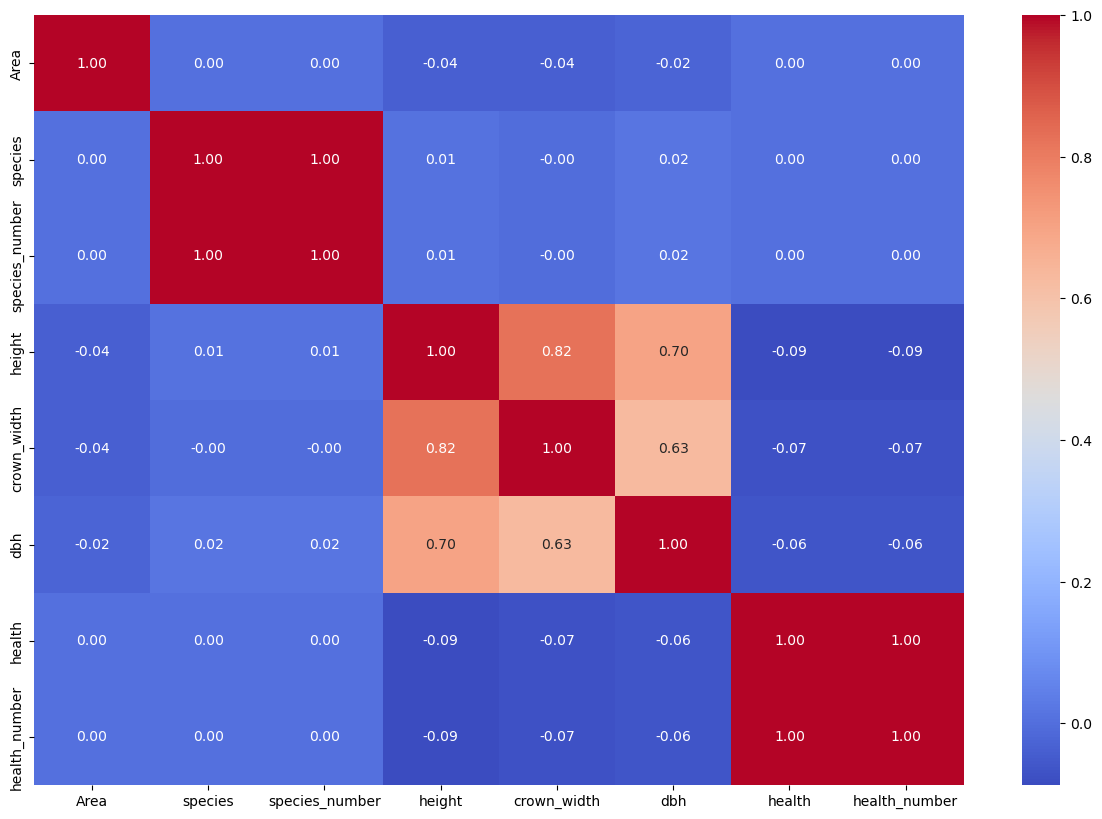

In [34]:
# Histogram of numerical features
df.hist(figsize=(15, 10))
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols])
plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


# Step 4: Model Implementation

In [9]:
# Define input features (X) and target variable (y):

# Features
X = df.drop(columns=["health", "health_number"])

# Target variable
y = df["health"]


In [11]:
# Split dataset(70/30):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Train 4 models (Logistic Regression, Decision Tree, Random Forest, XGBoost):

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully!")


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
XGBoost trained successfully!


# Step 5: Model Evaluation

### Evaluate each model on the test set:

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.9087
Precision: 0.8257
Recall: 0.9087
F1 Score: 0.8652
Confusion Matrix:
 [[    0     0     6     0]
 [    0     0  2499     0]
 [    0     0 28447     0]
 [    0     0   354     0]]

Model: Decision Tree
Accuracy: 0.9006
Precision: 0.8391
Recall: 0.9006
F1 Score: 0.8643
Confusion Matrix:
 [[    0     0     6     0]
 [    0    57  2441     1]
 [    0   301 28136    10]
 [    0     3   351     0]]


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
Accuracy: 0.9053
Precision: 0.8441
Recall: 0.9053
F1 Score: 0.8658
Confusion Matrix:
 [[    0     0     6     0]
 [    0    39  2459     1]
 [    0   134 28303    10]
 [    0     3   351     0]]

Model: XGBoost
Accuracy: 0.9083
Precision: 0.8548
Recall: 0.9083
F1 Score: 0.8661
Confusion Matrix:
 [[    0     0     6     0]
 [    0    18  2481     0]
 [    0    31 28416     0]
 [    0     1   353     0]]


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ROC Curve (for classification models):

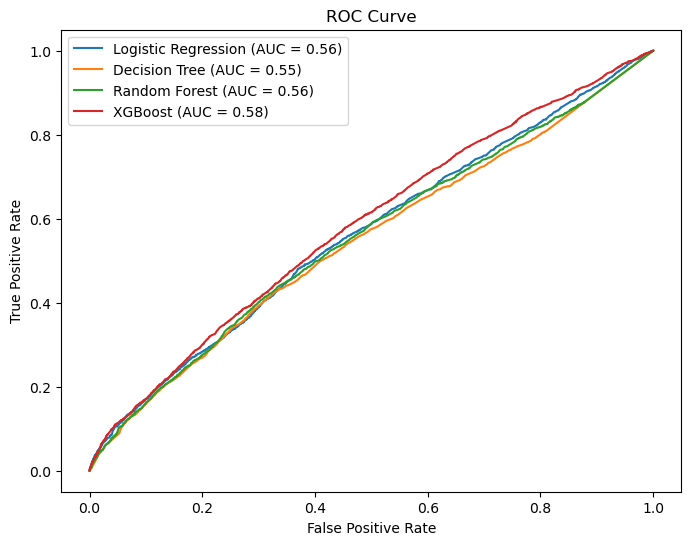

In [14]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Some models don't support predict_proba
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Step 6: Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np


### Define Parameter Grids for Each Model

In [16]:
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 6, 10]
    }
}


### Perform Hyperparameter Tuning

In [17]:
best_models = {}

for model_name, param_grid in param_grids.items():
    print(f"Hyperparameter tuning for {model_name}...")

    if model_name == "Logistic Regression":
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression()
    elif model_name == "Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier()
    elif model_name == "Random Forest":
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier()
    elif model_name == "XGBoost":
        from xgboost import XGBClassifier
        model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")

    # Perform Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store the best model and parameters
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_:.4f}\n")


Hyperparameter tuning for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.001, 'solver': 'liblinear'}
Best accuracy: 0.9115

Hyperparameter tuning for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Best accuracy: 0.9117

Hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy: 0.9117

Hyperparameter tuning for XGBoost...


C:\Users\Ashik\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50}
Best accuracy: 0.9119



# Evaluate the Best Models After Hyperparameter Tuning

In [18]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Model Performance:
Accuracy: 0.9087
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00      2499
           2       0.91      1.00      0.95     28447
           3       0.00      0.00      0.00       354

    accuracy                           0.91     31306
   macro avg       0.23      0.25      0.24     31306
weighted avg       0.83      0.91      0.87     31306


Decision Tree Model Performance:
Accuracy: 0.9088
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.61      0.00      0.01      2499
           2       0.91      1.00      0.95     28447
           3       0.00      0.00      0.00       354

    accuracy                           0.91     31306
   macro avg       0.38      0.25      0.24     31306
weighted avg       0.87      0.91      0.87     31306


Random Forest Model P

C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.52      0.01      0.01      2499
           2       0.91      1.00      0.95     28447
           3       0.00      0.00      0.00       354

    accuracy                           0.91     31306
   macro avg       0.36      0.25      0.24     31306
weighted avg       0.87      0.91      0.87     31306


XGBoost Model Performance:
Accuracy: 0.9089
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.73      0.00      0.01      2499
           2       0.91      1.00      0.95     28447
           3       0.00      0.00      0.00       354

    accuracy                           0.91     31306
   macro avg       0.41      0.25      0.24     31306
weighted avg       0.88      0.91      0.87     31306



C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packag

# 5. Save the Best Models

In [19]:
import joblib

for name, model in best_models.items():
    joblib.dump(model, f"{name.replace(' ', '_')}_best_model.pkl")

print("All best models saved successfully!")


All best models saved successfully!


# Import a model and test it

In [35]:
# Import saved model

import joblib

# Load the saved XGBoost model
model_path = "XGBoost_best_model.pkl"
xgb_model = joblib.load(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [29]:
# Example input: [area,species , species_number, height, crown_width, dbh]
sample_input = [[3,1, 1, 8, 2.5, 20]]


In [30]:
#Health Prediction

sample_prediction = xgb_model.predict(sample_input)
print("Predicted Class for Sample:", sample_prediction)


Predicted Class for Sample: [1]
